## Multivariate Time Series Forecasting with LSTM
@author: Prathish Murugan


See the preprocessing.ipynb before this notebook

In [2]:
#Importing variables from preprocessing 

%store -r trainX
%store -r trainY
%store -r n_future
%store -r n_past
%store -r train_dates
%store -r df_for_training
%store -r scaler
%store -r df

In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

In [4]:
#Using the Macbook GPU for better performance
physical_devices = tf.config.list_physical_devices('GPU')
#physical_devices = tf.config.list_physical_devices('CPU')
tf.print(physical_devices)
#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-08-30 20:41:07.657753: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-30 20:41:07.657801: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-30 20:41:07.657814: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-30 20:41:07.657875: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-30 20:41:07.657905: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
print(tf.config.list_physical_devices())
# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print('GPU is available')
else:
    print('GPU is NOT available')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU is available


#### Model Building

In [6]:
# define the Autoencoder model

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))

#input shape = (14,5)
#Return sequence as I want this LSTM to return the sequence to the next LSTM, as it is a stacked LSTM

#Gave activation as 'tanh' cause cuDNN wont work with'relu' 

model.add(LSTM(32, activation='tanh', return_sequences=False))
model.add(Dropout(0.2)) #Regularization, to avoid overfitting
model.add(Dense(trainY.shape[1]))

#trainY.shape[1] = 1

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            17920     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=512, validation_split=0.1, verbose=1)

Epoch 1/10


2023-08-30 20:41:29.964209: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-30 20:41:30.121155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-30 20:41:30.185636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-30 20:41:30.313150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 8/20 [===========>..................] - ETA: 0s - loss: 0.4413

2023-08-30 20:41:30.402445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 2s 39ms/step - loss: 0.2432 - val_loss: 0.0181
Epoch 2/10
 1/20 [>.............................] - ETA: 0s - loss: 0.0525

2023-08-30 20:41:31.042346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-30 20:41:31.094022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-30 20:41:31.131441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 0s 18ms/step - loss: 0.0516 - val_loss: 0.0091
Epoch 3/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0267 - val_loss: 0.0024
Epoch 4/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0195 - val_loss: 0.0022
Epoch 5/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0161 - val_loss: 0.0035
Epoch 6/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0149 - val_loss: 0.0034
Epoch 7/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0144 - val_loss: 0.0032
Epoch 8/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0139 - val_loss: 0.0025
Epoch 9/10
20/20 [==============================] - 0s 18ms/step - loss: 0.0128 - val_loss: 0.0020
Epoch 10/10
20/20 [==============================] - 0s 17ms/step - loss: 0.0120 - val_loss: 0.0022


## Benchmarking
#### CPU
<pre>
- CPU | Batch size = 16   | loss: 0.0103 - val_loss: 5.1876e-04 | Time Taken to fit = 25s 
- CPU | Batch size = 512  | loss: 0.0089 - val_loss: 5.1310e-04 | Time Taken to fit = 9s
- CPU | Batch size = 1024 | loss: 0.0090 - val_loss: 4.9307e-04 | Time Taken to fit = 8s
- CPU | Batch size = 4096 | loss: 0.0558 - val_loss: 0.0046     | Time Taken to fit = 2s
</pre>
**In CPU even though batch = 4096 was quicker, it has more loss than 1024, which is the most optimal.**

#### M1 GPU
<pre>
- GPU | Batch size = 16   | loss: 6.1139e-04 - val_loss: 0.0021 | Time Taken to fit = 1 min 22s 
- GPU | Batch size = 512  | loss: 0.0134 - val_loss: 0.0022     | Time Taken to fit = 4s
- GPU | Batch size = 1024 | loss: 0.0157 - val_loss: 0.0042     | Time Taken to fit = 4s
- GPU | Batch size = 4096 | loss: 0.0313 - val_loss: 0.0064     | Time Taken to fit = 3s
</pre>
**Same in GPU as CPU, even though batch = 4096 was quicker, it has more loss than 1024, which is the most optimal.**
<pre>

</pre>

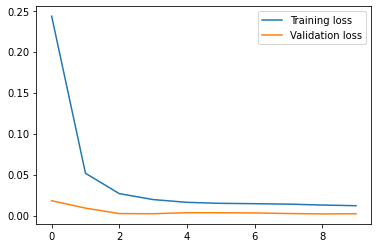

In [8]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


### Prediction

In [9]:
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

[Timestamp('2023-08-07 00:00:00', freq='C'), Timestamp('2023-08-08 00:00:00', freq='C'), Timestamp('2023-08-09 00:00:00', freq='C'), Timestamp('2023-08-10 00:00:00', freq='C'), Timestamp('2023-08-11 00:00:00', freq='C'), Timestamp('2023-08-14 00:00:00', freq='C'), Timestamp('2023-08-15 00:00:00', freq='C'), Timestamp('2023-08-16 00:00:00', freq='C'), Timestamp('2023-08-17 00:00:00', freq='C'), Timestamp('2023-08-18 00:00:00', freq='C'), Timestamp('2023-08-21 00:00:00', freq='C'), Timestamp('2023-08-22 00:00:00', freq='C'), Timestamp('2023-08-23 00:00:00', freq='C'), Timestamp('2023-08-24 00:00:00', freq='C'), Timestamp('2023-08-25 00:00:00', freq='C')]


In [10]:
#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

1/1 [==============================] - 0s 298ms/step


2023-08-30 20:41:46.840582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-30 20:41:46.889318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-08-30 20:41:46.932470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [11]:
#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [12]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


In [13]:
original = df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

/var/folders/50/x3m5nv1558v3d78g8w5wff2m0000gn/T/ipykernel_46793/2126096244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


/Users/pratishmurugan/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/pratishmurugan/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Open'>

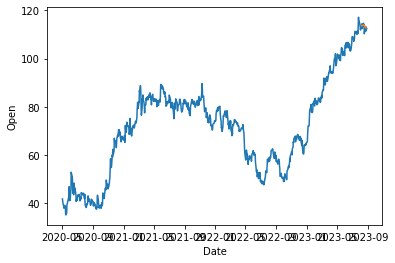

In [14]:
sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])

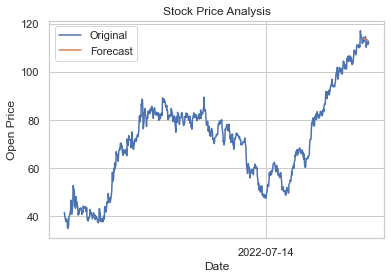

In [15]:
import matplotlib.dates as mdates
sns.set(style="whitegrid")

# Plot the original data
sns.lineplot(data=original, x='Date', y='Open', label='Original')

# Plot the forecast data
sns.lineplot(data=df_forecast, x='Date', y='Open', label='Forecast')

# Get the current Axes (Subplot) and set the major locator for the x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1100))

# Set labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Stock Price Analysis')
plt.legend()

# Show the plot
plt.show()